# **Computer Vision for Pneumonia Lung X-Ray Classification**

**`Created by:`**

Michael Nathaniel

---
## **1. Perkenalan**

**Nama   :** `Michael Nathaniel`

**Batch  :** `HCK-009`

**`Informasi Dataset:`**

Dataset ini terdiri dari gambar X-ray dada anak-anak yang dikumpulkan di Guangzhou Women and Children's Medical Center, Guangzhou, China. Dataset ini mencakup total 5.863 gambar X-ray dalam format JPEG, yang dikategorikan menjadi dua kelas: Pneumonia dan Normal. Gambar-gambar ini telah digunakan untuk mengembangkan sistem kecerdasan buatan untuk analisis X-ray dada.

**`Objective:`**

Proyek ini bertujuan mengembangkan model komputer yang dapat melakukan klasifikasi apakah seseorang menderita Pneumonia atau tidak, berdasarkan hasil X-ray paru-paru pasien. Pendekatan yang diterapkan dalam pembuatan model ini adalah konsep Computer Vision, dengan implementasi arsitektur Artificial Neural Network untuk memahami hubungan kompleks antara gambar X-ray dan keberadaan Pneumonia. Prinsip dasar proyek ini melibatkan pelatihan model untuk mengenali pola dan fitur pada gambar X-ray yang menunjukkan adanya Pneumonia. Dengan demikian, proyek ini bersifat esensial dalam pengaplikasian teknologi kecerdasan buatan dalam bidang diagnostik medis.

**`Problems:`** 

Buatlah model komputer yang dapat melakukan klasifikasi apakah seseorang menderita Pneumonia atau tidak, berdasarkan hasil X-ray paru-paru pasien.

---
## **2. Import Libraries**

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from keras.applications import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

---
## **3. Data Loading**

Bagian ini berisi proses pengunduhan dan penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset yang digunakan pada project ini berasal dari Kaggle dengan url sebagai berikut: `https://www.kaggle.com/datasets/thomasdubail/chest-pneumonia-256x256`

Kita akan lakukan generator data yang menampung data Train, Test, dan Val yang masing-masing nya terdiri dari class normal (paru-paru normal) dan pneumonia (paru-paru dengan pneumonia).

In [2]:
# Normalisasi intensitas piksel ke dalam rentang 0 hingga 1
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)
val_datagen = ImageDataGenerator(rescale=1./255.)

# Persiapkan generator data pelatihan dengan data dari direktori 'test'
print("Data Training:")
train_gen = train_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\train",
	target_size=(150,150),
	class_mode='binary', 
  	batch_size=126,
	shuffle=False
)

# Persiapkan generator data pengujian dengan data dari direktori 'train'
print("\nData Testing:")
test_gen = test_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\test",
	target_size=(150,150),
	class_mode='binary',
	batch_size=126,
	shuffle=False
)

# Persiapkan generator data validasi dengan data dari direktori 'val'
print("\nData Validation:")
val_gen = val_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\val",
	target_size=(150,150),
	class_mode='binary',
  	batch_size=126,
	shuffle=False
)

Data Training:
Found 4211 images belonging to 2 classes.

Data Testing:
Found 624 images belonging to 2 classes.

Data Validation:
Found 3452 images belonging to 2 classes.


In [3]:
# Menampilkan shape untuk data training
print("Data Training Shape:")
print(train_gen.next()[0].shape)

# Menampilkan shape untuk data testing
print("\nData Testing Shape:")
print(test_gen.next()[0].shape)

# Menampilkan shape untuk data validation
print("\nData Validation Shape:")
print(val_gen.next()[0].shape)

Data Training Shape:
(126, 150, 150, 3)

Data Testing Shape:
(126, 150, 150, 3)

Data Validation Shape:
(126, 150, 150, 3)


In [4]:
# Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data training
print("Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data Training:")
print(train_gen.class_indices)

# Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data testing
print("\nMenampilkan dictionary yang memetakan nama kelas ke indeks untuk data Testing:")
print(test_gen.class_indices)

# Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data validation
print("\nMenampilkan dictionary yang memetakan nama kelas ke indeks untuk data Validation:")
print(val_gen.class_indices)

Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data Training:
{'normal': 0, 'pneumonia': 1}

Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data Testing:
{'normal': 0, 'pneumonia': 1}

Menampilkan dictionary yang memetakan nama kelas ke indeks untuk data Validation:
{'normal': 0, 'pneumonia': 1}


---
## **4. Exploratory Data Analysis (EDA)**

### **4.1. Menampilkan contoh paru-paru normal dan mengidap Pneumonia**

Sebelum kita memulai pembuatan program model prediksi, kita harus memahami terlebih dahulu bagaimana foto paru-paru normal dengan paru-paru pengidap pneumonia.

Dengan melakukan ini, kita bisa mengetahui apa perbedaannya dan juga melihat foto seperti apa yang akan kita hadapi dan gunakan dalam program ini.

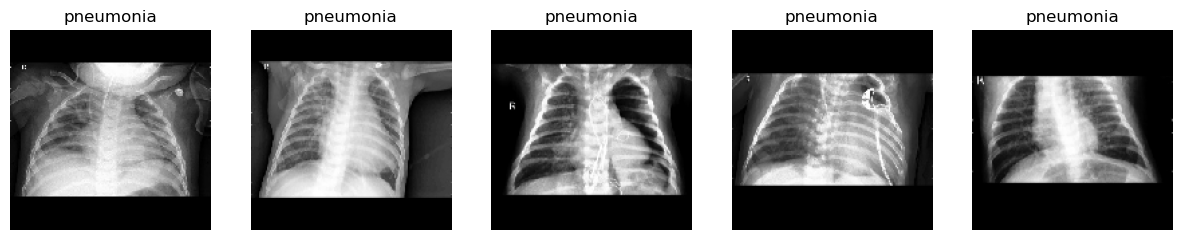

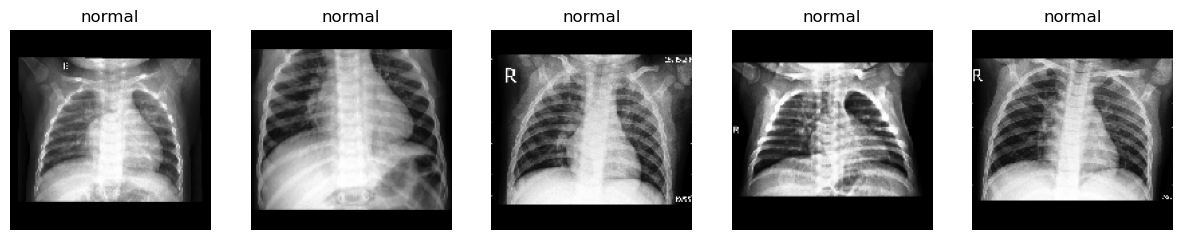

In [7]:
# Fungsi untuk menampilkan contoh gambar
def show_sample_images(generator, class_index, num_samples=5):
    # Mendapatkan nama kelas berdasarkan indeks
    class_name = [k for k, v in generator.class_indices.items() if v == class_index][0]

    # Memilih secara acak indeks gambar dari kelas tertentu
    indices = np.random.randint(len(generator.filepaths), size=num_samples)

    # Membuat subplot
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i, idx in enumerate(indices):
        # Membaca dan menampilkan gambar
        img_path = generator.filepaths[idx]
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0  # Normalisasi intensitas piksel
        axes[i].imshow(img_array)
        axes[i].axis('off')
        axes[i].set_title(class_name)

    plt.show()

# Menampilkan contoh gambar dengan pneumonia (kelas 1)
show_sample_images(train_gen, class_index=1, num_samples=5)

# Menampilkan contoh gambar tanpa pneumonia (kelas 0)
show_sample_images(train_gen, class_index=0, num_samples=5)

Pneumonia adalah suatu kondisi penyakit yang ditandai oleh peradangan pada jaringan paru-paru, khususnya pada kantong udara kecil yang disebut alveoli. Peradangan ini dapat disebabkan oleh infeksi bakteri, virus, atau jamur.

Visualisasi diatas adalah beberapa sampel foto X-ray paru-paru normal dan paru-paru pengidap pneumonia. X-ray paru-paru digunakan untuk memeriksa kondisi kesehatan paru-paru seseorang.

Pada kasus pneumonia, perubahan pada gambar X-ray dapat teramati. Area yang terkena pneumonia cenderung menunjukkan gambaran yang lebih gelap dan kabur akibat adanya cairan atau perubahan jaringan.

Sebaliknya, pada X-ray paru-paru yang normal, gambar yang terlihat akan lebih terang dan jelas tanpa adanya area yang gelap atau kabur. Oleh karena itu, kita dapat membedakan antara paru-paru normal dan yang mengidap pneumonia melalui pemeriksaan hasil X-ray tersebut.

### **4.2. Menghitung statistik intensitas piksel**

In [8]:
def calculate_pixel_statistics(data_generator):
    # Mengambil satu batch data
    batch = data_generator.next()[0]
    
    # Menghitung rata-rata intensitas piksel untuk setiap kanal warna (R, G, B)
    pixel_means = np.mean(batch, axis=(0, 1, 2))
    
    # Menghitung deviasi standar intensitas piksel untuk setiap kanal warna
    pixel_stds = np.std(batch, axis=(0, 1, 2))
    
    return pixel_means, pixel_stds

def print_pixel_statistics(pixel_means, pixel_stds):
    # Menampilkan hasil perhitungan
    print("Rata-rata intensitas piksel (RGB):", pixel_means)
    print("Deviasi standar intensitas piksel (RGB):", pixel_stds)

# Hitung dan cetak statistik intensitas piksel untuk dataset pelatihan
train_pixel_means, train_pixel_stds = calculate_pixel_statistics(train_gen)
print("Train Dataset:")
print_pixel_statistics(train_pixel_means, train_pixel_stds)

# Hitung dan cetak statistik intensitas piksel untuk dataset pengujian
test_pixel_means, test_pixel_stds = calculate_pixel_statistics(test_gen)
print("\nTest Dataset:")
print_pixel_statistics(test_pixel_means, test_pixel_stds)

# Hitung dan cetak statistik intensitas piksel untuk dataset validasi
val_pixel_means, val_pixel_stds = calculate_pixel_statistics(val_gen)
print("\nValidation Dataset:")
print_pixel_statistics(val_pixel_means, val_pixel_stds)

Train Dataset:
Rata-rata intensitas piksel (RGB): [0.372602 0.372602 0.372602]
Deviasi standar intensitas piksel (RGB): [0.33083284 0.33083284 0.33083284]

Test Dataset:
Rata-rata intensitas piksel (RGB): [0.3283731 0.3283731 0.3283731]
Deviasi standar intensitas piksel (RGB): [0.3325694 0.3325694 0.3325694]

Validation Dataset:
Rata-rata intensitas piksel (RGB): [0.37506035 0.37506035 0.37506035]
Deviasi standar intensitas piksel (RGB): [0.331352 0.331352 0.331352]


Terlihat bahwa rata-rata intensitas piksel tidak memiliki perbedaan yang signifikan antara dataset pelatihan, pengujian, dan validasi. Rata-rata intensitas piksel mencerminkan seberapa cerah atau gelap warna secara keseluruhan. Semakin tinggi nilai rata-rata, semakin cerah gambar tersebut. Hasil yang diperoleh menunjukkan bahwa distribusi intensitas piksel relatif seragam di seluruh dataset.

Deviasi standar intensitas piksel juga cukup serupa di seluruh dataset, menunjukkan bahwa variasi intensitas piksel tidak terlalu besar. Deviasi standar mengukur sejauh mana intensitas piksel tersebar dari nilai rata-rata. Semakin tinggi deviasi standar, semakin bervariasi intensitas pikselnya.

### **4.3. Menghitung jumlah sampel untuk setiap kelas pada data testing, training, dan validation**

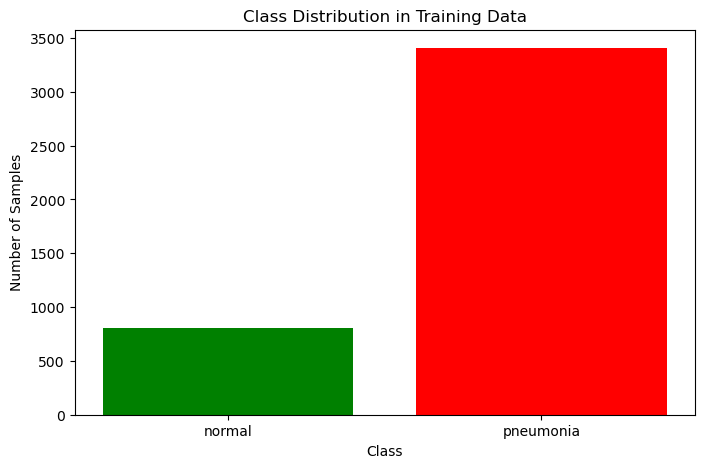

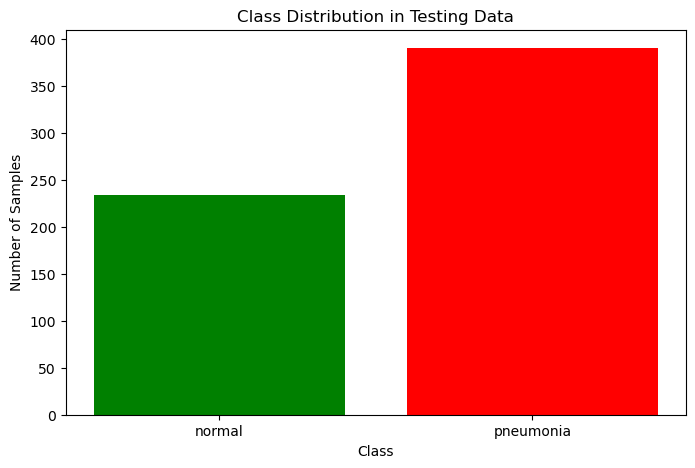

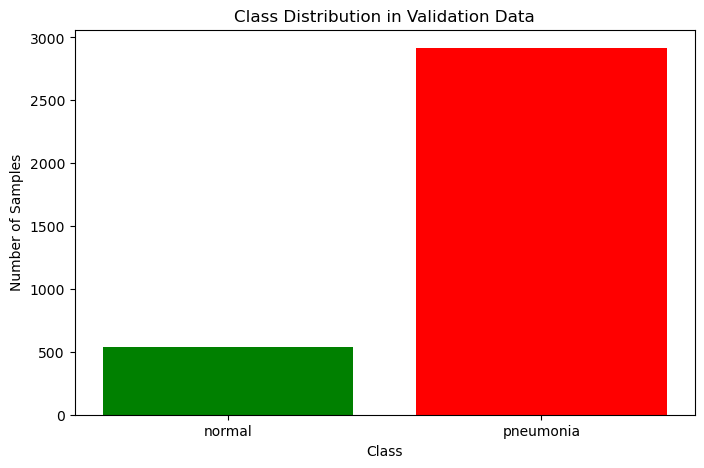

In [9]:
def plot_class_distribution(data_generator, title):
    # Hitung jumlah sampel untuk setiap kelas
    classes = list(data_generator.class_indices.keys())
    samples = [len(os.listdir(os.path.join(data_generator.directory, cls))) for cls in classes]

    # Visualisasikan perbandingan jumlah sampel antara kelas
    plt.figure(figsize=(8, 5))
    plt.bar(classes, samples, color=['green', 'red'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Panggil fungsi untuk setiap set data (train, test, val)
plot_class_distribution(train_gen, 'Class Distribution in Training Data')
plot_class_distribution(test_gen, 'Class Distribution in Testing Data')
plot_class_distribution(val_gen, 'Class Distribution in Validation Data')

Dari hasil pengecekan, terlihat bahwa pada keseluruhan dataset yang kita gunakan baik pada data training, testing, dan validation, data foto rontgen pasian yang mengidap penumonia menjadi foto terbanyak dibandingkan foto yang normal. Untuk menghasilkan model dengan performansi yang baik, kita akan melakukan handling terhadap data yang tidak seimbang ini.

### **4.4. Melihat distribusi ukuran gambar pada data training, testing, dan validation**

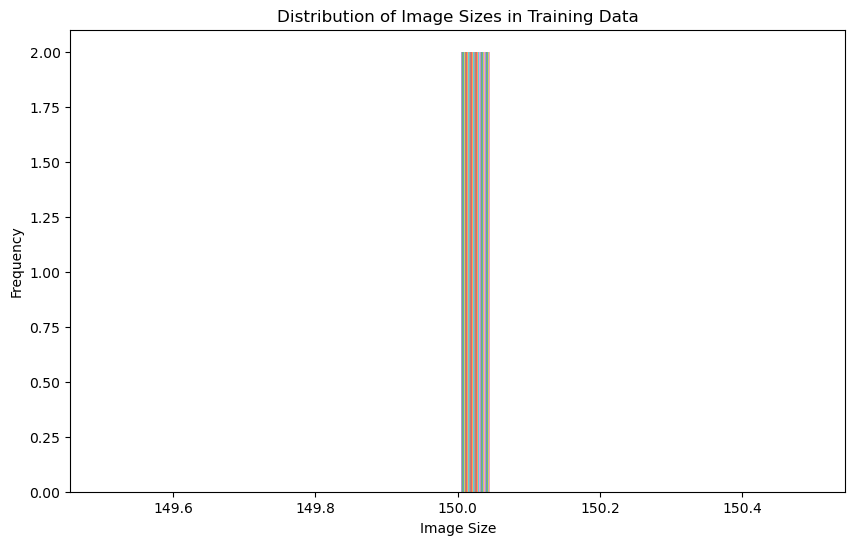

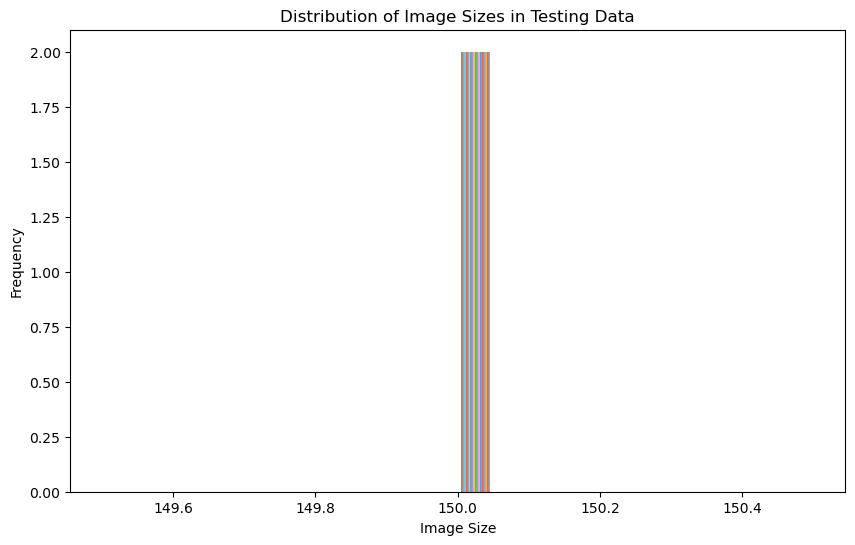

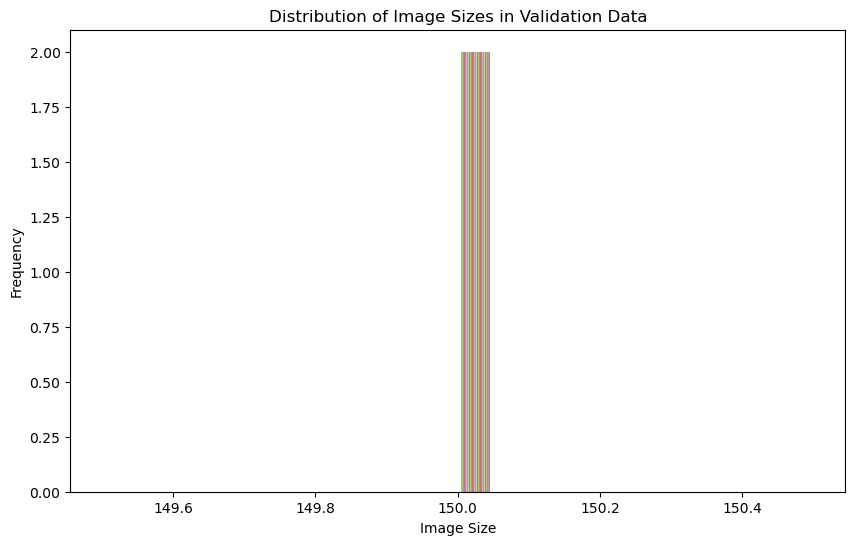

In [10]:
def plot_image_size_distribution(data_generator, title):
    sizes = []

    # Loop through the directory and collect image sizes
    for path, _, files in os.walk(data_generator.directory):
        for file in files:
            img = image.load_img(os.path.join(path, file), target_size=data_generator.target_size)
            sizes.append(img.size)

    # Visualize the distribution of image sizes
    plt.figure(figsize=(10, 6))
    plt.hist(sizes, bins=20, alpha=0.7)
    plt.title(title)
    plt.xlabel('Image Size')
    plt.ylabel('Frequency')
    plt.show()

# Panggil fungsi untuk setiap set data (train, test, val)
plot_image_size_distribution(train_gen, 'Distribution of Image Sizes in Training Data')
plot_image_size_distribution(test_gen, 'Distribution of Image Sizes in Testing Data')
plot_image_size_distribution(val_gen, 'Distribution of Image Sizes in Validation Data')

Dari hasil pengecekan dengan visualisasi, terlihat bahwa distribusi ukuran gambar pada dataset yang kita gunakan baik data training, testing, maupun validation adalah serupa.

### **4.5. Memeriksa mode warna RGB atau CMYK dari foto-foto dalam set training, testing, dan validation**

In [11]:
def check_color_mode_in_directory(data_generator, title):
    rgb_count = 0
    cmyk_count = 0

    # Loop through the directory and check color mode of each image
    for path, _, files in os.walk(data_generator.directory):
        for file in files:
            img_path = os.path.join(path, file)
            img = Image.open(img_path)

            # Check color mode
            if img.mode == 'RGB':
                rgb_count += 1
            elif img.mode == 'CMYK':
                cmyk_count += 1

    # Print the results
    print(f"RGB Images: {rgb_count}")
    print(f"CMYK Images: {cmyk_count}")

# Panggil fungsi untuk setiap set data (train, test, val)
print("Train Dataset:")
check_color_mode_in_directory(train_gen, 'Training Data')
print("\nTest Dataset:")
check_color_mode_in_directory(test_gen, 'Testing Data')
print("\nValidation Dataset:")
check_color_mode_in_directory(val_gen, 'Validation Data')

Train Dataset:
RGB Images: 4211
CMYK Images: 0

Test Dataset:
RGB Images: 624
CMYK Images: 0

Validation Dataset:
RGB Images: 3452
CMYK Images: 0


Hasil analisis channel warna pada dataset gambar rontgen paru-paru menunjukkan konsistensi yang baik dalam format gambar. Seluruh subset data, termasuk training, testing, dan validation, menampilkan gambar dengan mode warna 'RGB'. Tidak ditemukan gambar dengan mode warna 'CMYK' pada seluruh dataset.

Konsistensi ini memberikan keyakinan bahwa dataset memiliki karakteristik yang seragam dalam hal format gambar, memungkinkan model untuk mengenali pola dan fitur dengan efektif selama pelatihan. Tidak adanya gambar dengan mode warna 'CMYK' juga dapat dianggap positif, khususnya jika fokusnya adalah pada pelatihan model untuk memproses gambar medis dalam format warna 'RGB'.

Sebagai langkah selanjutnya, pra-pemrosesan data tambahan, seperti normalisasi intensitas piksel atau augmentasi gambar, dapat diterapkan untuk memastikan persiapan yang optimal sebelum melibatkan model dalam proses pembelajaran. Keseluruhan, hasil ini memberikan wawasan yang berguna tentang kualitas dan karakteristik homogen dataset, membantu memastikan kesiapan data untuk pengembangan model klasifikasi.

---
## **5. Feature Engineering**

### **5.1. Data Balancing**

Pada tahap EDA, kita temukan bahwa data paru-paru normal dengan paru-paru pneumonia tidak memiliki jumlah yang sama antar keduanya (data imbalance). Jika biarkan, hal ini dapat mengakibatkan model kita menjadi bias terhadap salah satu data. Untuk menangani hal tersebut, kita akan melakukan handling data imbalance menggunakan class weight.

Class weights digunakan dalam computer vision untuk menangani ketidakseimbangan data, di mana satu kelas memiliki lebih banyak sampel daripada yang lain. Mereka memberikan bobot lebih besar pada kelas yang kurang umum selama pelatihan model, meningkatkan sensitivitas terhadap kelas minoritas dan membantu model menangani ketidakseimbangan data.

In [12]:
# Hitung berapa kali masing-masing kelas muncul dalam data pelatihan
class_counts = np.unique(train_gen.classes, return_counts=True)[1]

# Hitung class weights untuk melakukan balancing
class_weights = {i: max(class_counts) / count for i, count in enumerate(class_counts)}

### **5.2. Data Load dan Data Augmentation**

Untuk menghasilkan model yang baik, kita harus bisa menghasilkan data-data yang siap menghadapi inputan yang "buruk".

Dalam hal ini, buruk dapat kita asumsikan sebagai posisi gambar yang salah, ataupun hasil rontgen (xray) yang terbalik.

Oleh karena itu kita akan memberikan agumentasi data terhadap data train (latihan) agar model juga dapat memahami data foto paru-paru meskipun terbalik sekalipun.

In [13]:
# Normalisasi intensitas piksel ke dalam rentang 0 hingga 1
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255.)
val_datagen = ImageDataGenerator(rescale=1./255.)

# Persiapkan generator data pelatihan dengan data dari direktori 'test'
train_gen = train_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\train",
	target_size=(150,150),
	class_mode='binary', 
  	batch_size=126,
	shuffle=False
)

# Persiapkan generator data pengujian dengan data dari direktori 'train'
test_gen = test_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\test",
	target_size=(150,150),
	class_mode='binary',
	batch_size=126,
	shuffle=False
)

# Persiapkan generator data validasi dengan data dari direktori 'val'
val_gen = val_datagen.flow_from_directory(
	r"C:\Users\Michael Nathaniel\Hacktiv8_FTDS_MichaelNathaniel\H8_FTDS_Phase_2\H8_FTDS_P2_GradedChallenges\H8_FTDS_P1_GC_7\p2-ftds009-hck-g7-MichaelN20\Data\val",
	target_size=(150,150),
	class_mode='binary',
  	batch_size=126,
	shuffle=False
)

Found 4211 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.


Pada pembuatan data train untuk model kita kali ini, kita hanya akan memberikan dua jenis augmentasi data pada foto paru-paru yaitu horizontal flip.

Alasan mengapa kita hanya akan menggunakan horizontal flip adalah karena model ini diharapkan berguna untuk menganalisa apakah seseorang mengidap pneumonia atau tidak berdasarkan hasil xray yang dimana umumnya hasil xray memiliki tata cara foto tertentu dan memiliki standar tersendiri agar foto xray dapat dianggap valid dan dapat dibaca. Sehingga minim kemungkinan foto xray terlalu aneh seperti miring yang ekstrem.

---
## **6. Model Definition**

Pada tahap ini, kita akan mendefinisikan 3 model deep learning computer vision yang berbeda-beda yaitu model standar, model dengan dropout, dan model dengan ResNet50.

### **6.1. Base Model Definition**

In [14]:
model_base = Sequential()

# input layer
model_base.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_base.add(MaxPooling2D((2, 2)))

# hidden layer
model_base.add(Conv2D(64, (3, 3), activation='relu'))
model_base.add(MaxPooling2D((2, 2)))
model_base.add(Conv2D(128, (3, 3), activation='relu'))
model_base.add(MaxPooling2D((2, 2)))

# fully connected layer
model_base.add(Flatten())
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(1, activation='sigmoid'))

# Compile model dengan menggunakan class weights
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### **6.2. Model with Dropout Defintion**

In [15]:
model_with_dropout = Sequential()

# input layer
model_with_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout layer to prevent overfitting

# hidden layer
model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout layer to prevent overfitting

# fully connected layer
model_with_dropout.add(Flatten())
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.1))  # Dropout layer to prevent overfitting
model_with_dropout.add(Dense(1, activation='sigmoid'))

# Compile model dengan menggunakan class weights
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

### **6.3. Model with ResNet50 Definition**

In [16]:
# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model
model_with_resnet50 = Sequential()

# Add the pre-trained ResNet50 model to the new model
model_with_resnet50.add(resnet_model)

# Add a Global Average Pooling layer
model_with_resnet50.add(GlobalAveragePooling2D())

# Add Fully Connected layers
model_with_resnet50.add(Dense(64, activation='relu'))
model_with_resnet50.add(Dense(128, activation='relu'))
model_with_resnet50.add(Dense(1, activation='sigmoid'))

# Compile the model
model_with_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_with_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 64)                131136    
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23727297 (90.51 MB)
Trainable params: 139585 (545.25 KB)
Non-trainable params: 23587712 (89.98 MB)
_______

---
## **7. Model Training**

### **7.1. Defining the steps per epoch**

Sebelum kita memulai model training, kita akan terlebih dahulu mendefinisikan langkah setiap epoch dan juga langkah validasi.

In [17]:
batch_size = 126

steps_per_epoch = train_gen.samples//batch_size
print(f"Steps per epoch: {steps_per_epoch}")

validation_steps = val_gen.samples//batch_size
print(f"Validation steps: {validation_steps}")

Steps per epoch: 33
Validation steps: 27


### **7.2. Base Model Training**

In [18]:
# Latih model dengan menggunakan class weights
history = model_base.fit(
    train_gen,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    verbose=1,
    validation_steps=validation_steps,
    class_weight=class_weights
)

Epoch 1/20
33/33 [==============================] - 56s 2s/step - loss: 3.2606 - accuracy: 0.7836 - val_loss: 0.6925 - val_accuracy: 0.8107
Epoch 2/20
33/33 [==============================] - 52s 2s/step - loss: 1.3912 - accuracy: 0.7936 - val_loss: 0.5320 - val_accuracy: 0.7725
Epoch 3/20
33/33 [==============================] - 53s 2s/step - loss: 0.9559 - accuracy: 0.7958 - val_loss: 0.3929 - val_accuracy: 0.7381
Epoch 4/20
33/33 [==============================] - 54s 2s/step - loss: 1.3467 - accuracy: 0.7576 - val_loss: 0.3909 - val_accuracy: 0.7942
Epoch 5/20
33/33 [==============================] - 56s 2s/step - loss: 0.9481 - accuracy: 0.7995 - val_loss: 0.6563 - val_accuracy: 0.6652
Epoch 6/20
33/33 [==============================] - 55s 2s/step - loss: 3.0005 - accuracy: 0.8015 - val_loss: 0.5580 - val_accuracy: 0.7601
Epoch 7/20
33/33 [==============================] - 56s 2s/step - loss: 0.8383 - accuracy: 0.7579 - val_loss: 0.3507 - val_accuracy: 0.7625
Epoch 8/20
33/33 [==

### **7.3. Model with Dropout Training**

In [19]:
# Latih model dengan menggunakan class weights
history2 = model_with_dropout.fit(
    train_gen,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    verbose=1,
    validation_steps=validation_steps,
    class_weight=class_weights
)

Epoch 1/20
33/33 [==============================] - 60s 2s/step - loss: 3.5890 - accuracy: 0.6081 - val_loss: 0.6902 - val_accuracy: 0.8407
Epoch 2/20
33/33 [==============================] - 57s 2s/step - loss: 1.1344 - accuracy: 0.7058 - val_loss: 0.6837 - val_accuracy: 0.7751
Epoch 3/20
33/33 [==============================] - 58s 2s/step - loss: 1.1086 - accuracy: 0.6778 - val_loss: 0.6454 - val_accuracy: 0.7860
Epoch 4/20
33/33 [==============================] - 58s 2s/step - loss: 0.9661 - accuracy: 0.7217 - val_loss: 0.4442 - val_accuracy: 0.8424
Epoch 5/20
33/33 [==============================] - 59s 2s/step - loss: 1.1312 - accuracy: 0.6732 - val_loss: 0.4335 - val_accuracy: 0.7684
Epoch 6/20
33/33 [==============================] - 60s 2s/step - loss: 1.3369 - accuracy: 0.7919 - val_loss: 0.5655 - val_accuracy: 0.6955
Epoch 7/20
33/33 [==============================] - 63s 2s/step - loss: 0.8092 - accuracy: 0.6796 - val_loss: 0.4488 - val_accuracy: 0.7431
Epoch 8/20
33/33 [==

### **7.4. Model with ResNet50 Training**

In [51]:
# Latih model dengan menggunakan class weights
history3 = model_with_resnet50.fit(
    train_gen,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    verbose=1,
    validation_steps=validation_steps,
    class_weight=class_weights
)

Epoch 1/20
33/33 [==============================] - 152s 5s/step - loss: 1.1924 - accuracy: 0.8338 - val_loss: 0.6276 - val_accuracy: 0.8424
Epoch 2/20
33/33 [==============================] - 149s 5s/step - loss: 1.1565 - accuracy: 0.2517 - val_loss: 0.7681 - val_accuracy: 0.1576
Epoch 3/20
33/33 [==============================] - 145s 4s/step - loss: 1.1369 - accuracy: 0.1998 - val_loss: 0.7057 - val_accuracy: 0.1576
Epoch 4/20
33/33 [==============================] - 148s 5s/step - loss: 1.1513 - accuracy: 0.6869 - val_loss: 0.6984 - val_accuracy: 0.2322
Epoch 5/20
33/33 [==============================] - 146s 5s/step - loss: 1.0633 - accuracy: 0.5488 - val_loss: 0.6785 - val_accuracy: 0.7781
Epoch 6/20
33/33 [==============================] - 148s 5s/step - loss: 1.1422 - accuracy: 0.6029 - val_loss: 0.6063 - val_accuracy: 0.8424
Epoch 7/20
33/33 [==============================] - 145s 4s/step - loss: 1.1424 - accuracy: 0.3329 - val_loss: 0.7005 - val_accuracy: 0.2243
Epoch 8/20
33

---
## **8. Model Evaluation**

Pada tahap ini, kita akan melakukan evaluasi terhadap 3 model yang telah kita definisikan dan latih sebelumnya.

Kita akan menggunakan metode plotting hasil training loss dan accuracu serta scoring testing loss dan accuracy.

### **8.1. Base Model Evaluation**

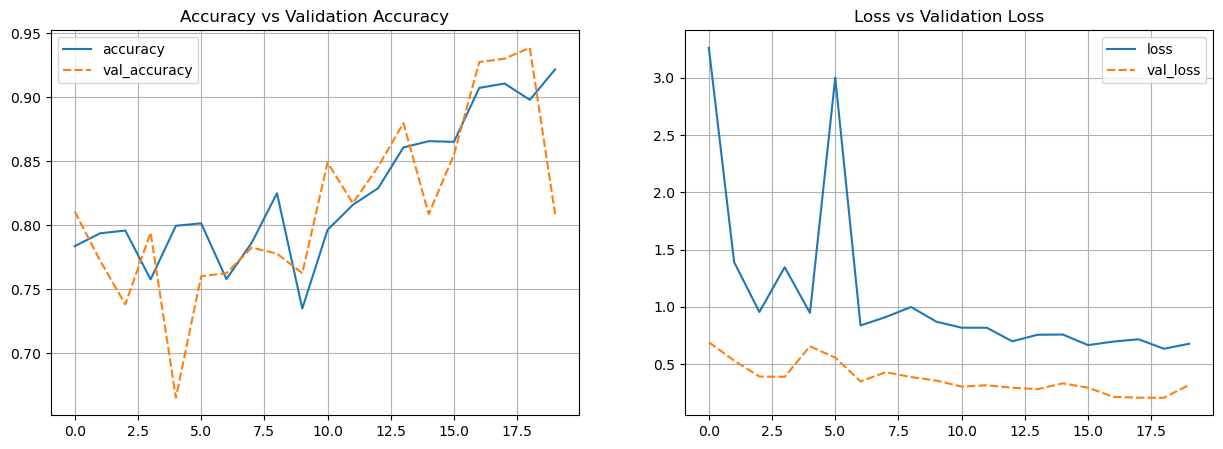

In [21]:
def plot_history(training_result):
    training_result_df = pd.DataFrame(training_result.history)
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(data=training_result_df[['accuracy', 'val_accuracy']])
    plt.grid()
    plt.title('Accuracy vs Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    sns.lineplot(data=training_result_df[['loss', 'val_loss']])
    plt.grid()
    plt.title('Loss vs Validation Loss')

    plt.show()

plot_history(history)

In [23]:
test_steps = np.ceil(test_gen.samples / 126) 
test_loss, test_acc = model_base.evaluate(test_gen, steps=test_steps)
print(f'Test loss: {test_loss}\n',
      f'Test accuracy: {test_acc}')

5/5 [==============================] - 2s 410ms/step - loss: 0.7681 - accuracy: 0.7949
Test loss: 0.7680889368057251
 Test accuracy: 0.7948718070983887


### **8.2. Model with Dropout Evaluation**

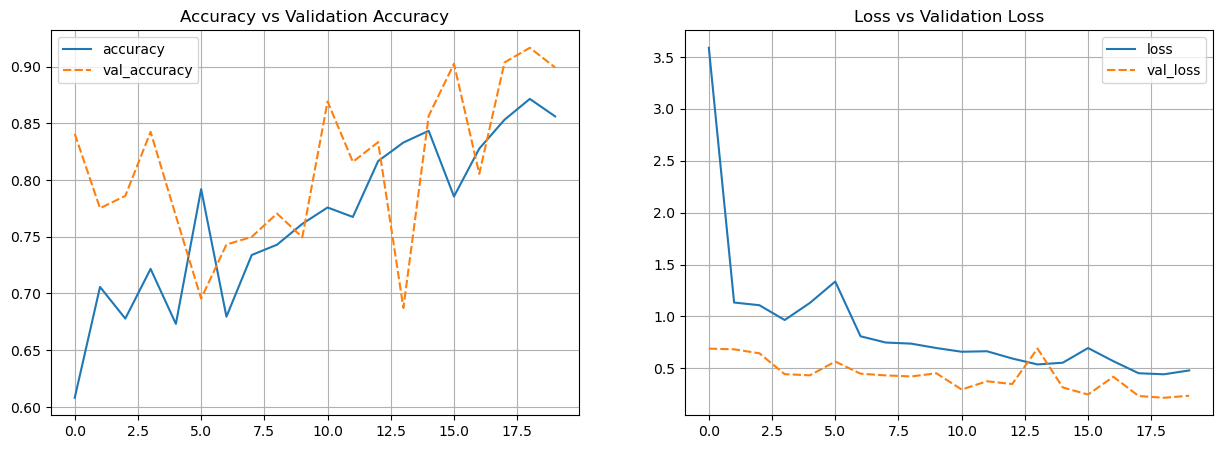

In [24]:
def plot_history(training_result):
    training_result_df = pd.DataFrame(training_result.history)
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(data=training_result_df[['accuracy', 'val_accuracy']])
    plt.grid()
    plt.title('Accuracy vs Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    sns.lineplot(data=training_result_df[['loss', 'val_loss']])
    plt.grid()
    plt.title('Loss vs Validation Loss')

    plt.show()

plot_history(history2)

In [26]:
test_steps = np.ceil(test_gen.samples / 126) 
test_loss, test_acc = model_with_dropout.evaluate(test_gen, steps=test_steps)
print(f'Test loss: {test_loss}\n',
      f'Test accuracy: {test_acc}')

5/5 [==============================] - 2s 308ms/step - loss: 0.6540 - accuracy: 0.7933
Test loss: 0.6539685130119324
 Test accuracy: 0.7932692170143127


### **8.3. Model with ResNet50 Evaluation**

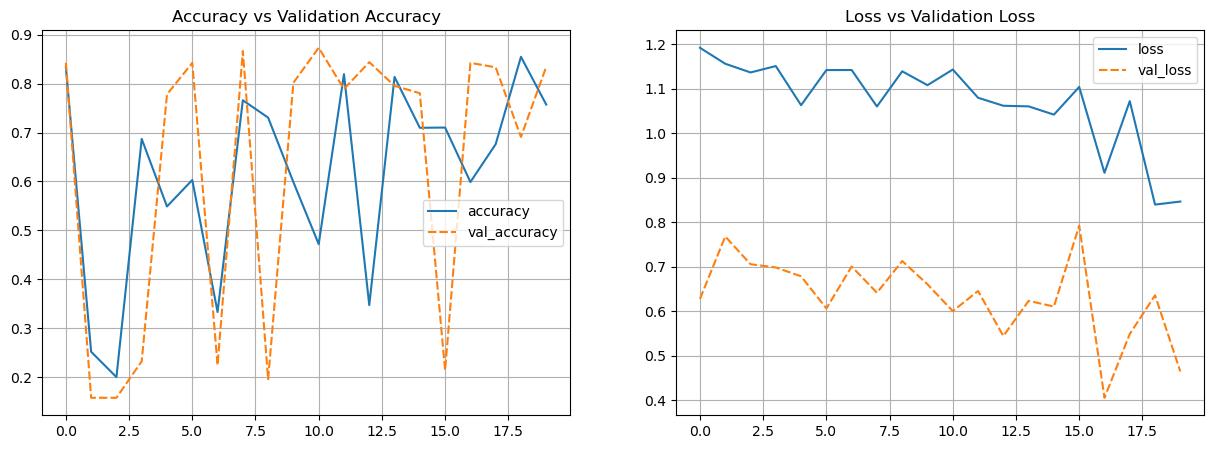

In [52]:
def plot_history(training_result):
    training_result_df = pd.DataFrame(training_result.history)
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(data=training_result_df[['accuracy', 'val_accuracy']])
    plt.grid()
    plt.title('Accuracy vs Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    sns.lineplot(data=training_result_df[['loss', 'val_loss']])
    plt.grid()
    plt.title('Loss vs Validation Loss')

    plt.show()

plot_history(history3)

In [53]:
test_steps = np.ceil(test_gen.samples / 126) 
test_loss, test_acc = model_with_resnet50.evaluate(test_gen, steps=test_steps)
print(f'Test loss: {test_loss}\n',
      f'Test accuracy: {test_acc}')

5/5 [==============================] - 15s 3s/step - loss: 0.5570 - accuracy: 0.7388
Test loss: 0.5569628477096558
 Test accuracy: 0.7387820482254028


### **8.4. Best Model Tuning**

Berdasarakan hasil pengujian ketiga model awal (base model, model with Dropout, model with ResNet50), kita temukan bahwa model yang mengandung Dropout memiliki performansi yang lebih baik dari pada 2 model lainnya. Kita juga temukan bahwa semkain bertambahnnya epoch, maka semakin meningkat accuracy dan val_accuracy score, serta semakin menurunnya loss dan val_loss score.

Alasan lain mengapa kita tidak menggunakan model tanpa dropout adalah karena model ini memiliki test loss yang lebih besar dibanding menggunakan dropout, dan lebih banyak explosion ekstrem yang terjadi serta jarak loss dengan val loss yang lumayan jauh.

Oleh karena itu, kita akan memilih model yang memiliki dropout untuk menjadi model utama kita yang kemudian akan kita hyperparameter tuning.

Kita juga akan mengimplementasikan checkpoint untuk menyimpan hasil terbaik dari training kseluruhan epoch.

In [32]:
final_model = Sequential()

# input layer
final_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.25))  # Dropout layer to prevent overfitting

# hidden layer
final_model.add(Conv2D(64, (3, 3), activation='relu'))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Conv2D(128, (3, 3), activation='relu'))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Conv2D(256, (3, 3), activation='relu'))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.25))  # Dropout layer to prevent overfitting

# fully connected layer
final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))
final_model.add(Dropout(0.1))  # Dropout layer to prevent overfitting
final_model.add(Dense(1, activation='sigmoid'))

# Compile model dengan menggunakan class weights
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

final_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)      

Dari model yang telah kita pilih sebelumnya, hyperparameter yang kita implementasikan adalah penambahan hidden layer, penambahan nilai epcoh dari 20 menjadi 30. Saya juga menambahkan callback checkpoint agar model terbaru hanya menyimpan model terbaik pada epoch tertentu dengan score loss dan accuracy paling optimal.

In [33]:
# Definisikan callback ModelCheckpoint
checkpoint = ModelCheckpoint("model_final.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

# Latih model dengan menggunakan class weights dan callback
history_final = final_model.fit(
    train_gen,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    verbose=1,
    validation_steps=validation_steps,
    class_weight=class_weights,
    callbacks=[checkpoint]
)

Epoch 1/30
33/33 [==============================] - ETA: 0s - loss: 1.2878 - accuracy: 0.7293
Epoch 1: val_accuracy improved from -inf to 0.84245, saving model to model_final.h5
33/33 [==============================] - 70s 2s/step - loss: 1.2878 - accuracy: 0.7293 - val_loss: 0.6709 - val_accuracy: 0.8424
Epoch 2/30


c:\Users\Michael Nathaniel\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - ETA: 0s - loss: 1.0267 - accuracy: 0.8338
Epoch 2: val_accuracy did not improve from 0.84245
33/33 [==============================] - 63s 2s/step - loss: 1.0267 - accuracy: 0.8338 - val_loss: 0.5288 - val_accuracy: 0.8424
Epoch 3/30
33/33 [==============================] - ETA: 0s - loss: 0.9949 - accuracy: 0.7647
Epoch 3: val_accuracy did not improve from 0.84245
33/33 [==============================] - 67s 2s/step - loss: 0.9949 - accuracy: 0.7647 - val_loss: 0.4465 - val_accuracy: 0.8183
Epoch 4/30
33/33 [==============================] - ETA: 0s - loss: 0.8307 - accuracy: 0.7667
Epoch 4: val_accuracy did not improve from 0.84245
33/33 [==============================] - 67s 2s/step - loss: 0.8307 - accuracy: 0.7667 - val_loss: 0.4533 - val_accuracy: 0.7340
Epoch 5/30
33/33 [==============================] - ETA: 0s - loss: 0.8139 - accuracy: 0.7596
Epoch 5: val_accuracy did not improve from 0.84245
33/33 [==============================] - 67s

### **8.5. Best Tuned Model Evaluation**

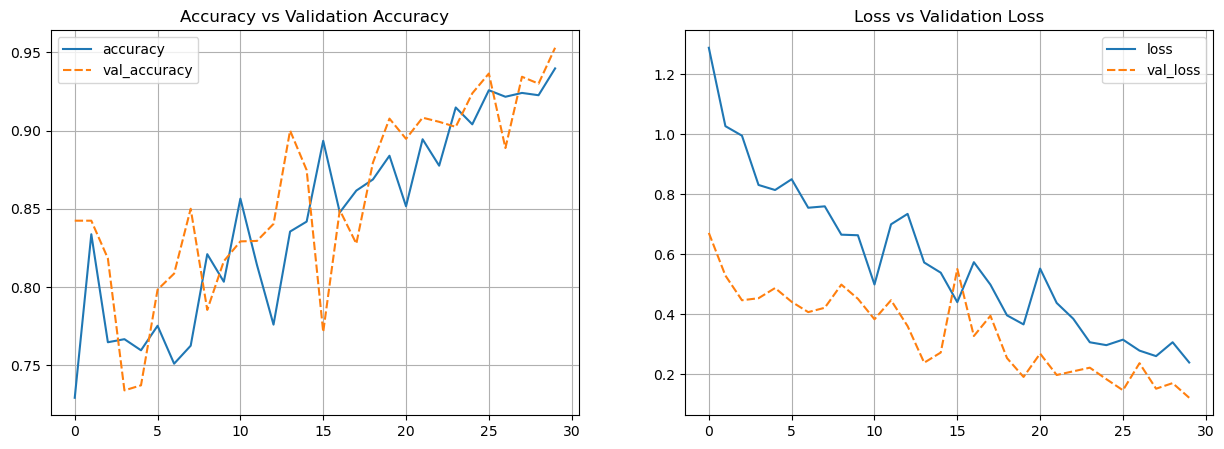

In [34]:
def plot_history(training_result):
    training_result_df = pd.DataFrame(training_result.history)
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(data=training_result_df[['accuracy', 'val_accuracy']])
    plt.grid()
    plt.title('Accuracy vs Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    sns.lineplot(data=training_result_df[['loss', 'val_loss']])
    plt.grid()
    plt.title('Loss vs Validation Loss')

    plt.show()

plot_history(history_final)

Dari hasil plotting kita temukan bahwa score accuracy semakin meningkat dan score loss semakin menurun seiring pertambahannay epoch. Dapat kita artikan bahwa tuning kita memberikan kemajuan terhadap model yang kita pilih.

34/34 [==============================] - 12s 355ms/step
              precision    recall  f1-score   support

      normal       0.76      0.98      0.85       805
   pneumonia       0.99      0.93      0.96      3406

    accuracy                           0.94      4211
   macro avg       0.88      0.95      0.91      4211
weighted avg       0.95      0.94      0.94      4211



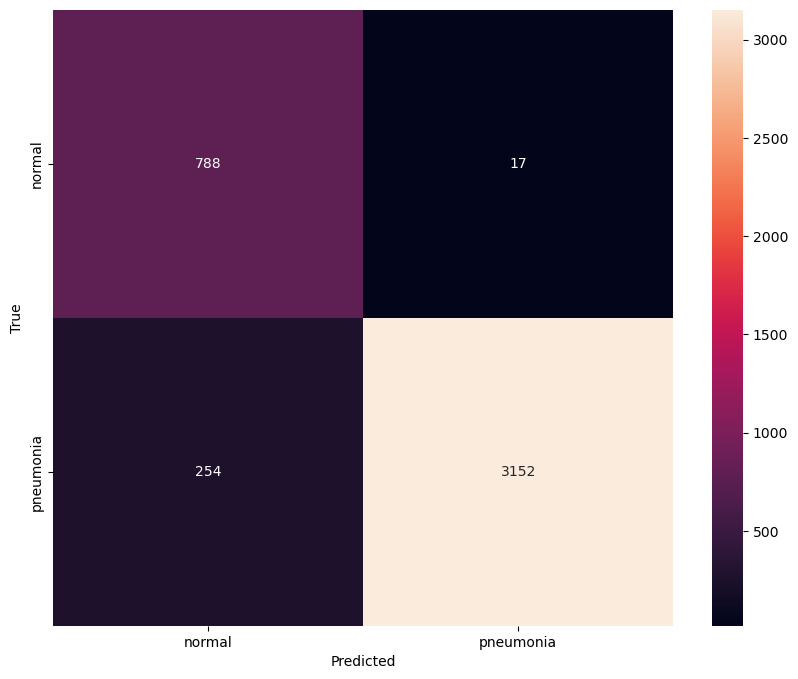

5/5 [==============================] - 2s 358ms/step
              precision    recall  f1-score   support

      normal       0.86      0.54      0.66       234
   pneumonia       0.77      0.95      0.85       390

    accuracy                           0.79       624
   macro avg       0.82      0.74      0.76       624
weighted avg       0.80      0.79      0.78       624



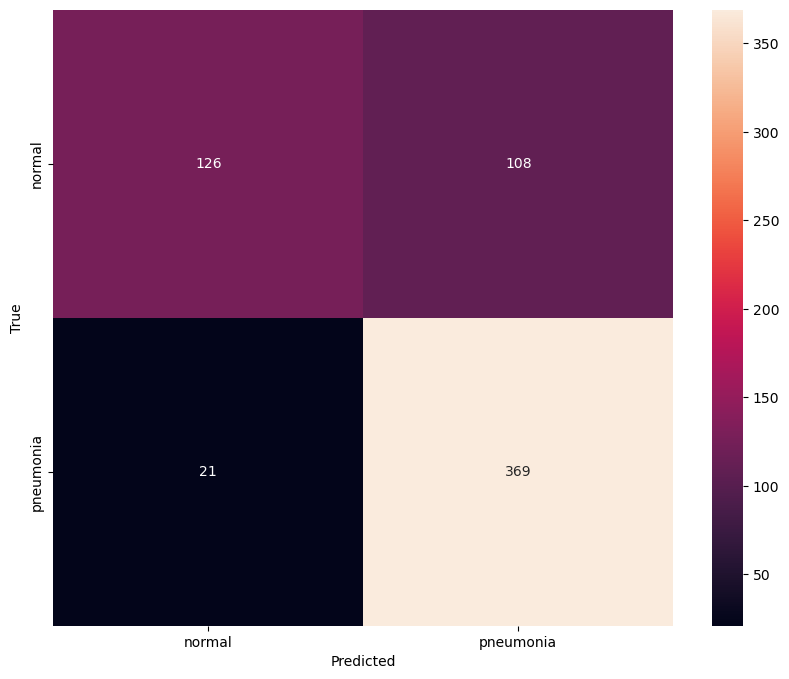

In [45]:
final_model = load_model('model_final.h5')

def confusion_matrix_plot(model, data):
    pred = model.predict(data, steps=len(data))
    pred_class = np.where(pred >= 0.7, 1, 0)
    true_class = data.classes
    class_labels = list(data.class_indices.keys())

    # Classification Report
    print(classification_report(true_class, pred_class, target_names=class_labels))

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_class, pred_class)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

confusion_matrix_plot(final_model, train_gen)
confusion_matrix_plot(final_model, test_gen)

Karena model yang kita buat bertujuan untuk membantu dokter dalam menganalisa penyakit pasien, maka kita akan berfokus pada akurasi ketepatan model untuk memprediksi adanya pneumonia pada paru-paru pasien. Oleh karena itu, kita akan berfokus pada recall 1 (recall untuk menunrunkan kemungkinan model salah prediksi pasien pneumonia dianggap normal || 1 adalah label yang mewakili paru-paru pneumonia).

Dari hasil classification report dan confussion matrix, kita temukan bahwa untuk model yang telah kita tune memiliki tingkat fitmen antara train dan test yang goodfit dimana model tidak terlalu banyak belajar data train paru-paru pneumonia namun gagal dalam identifikasi data test paru-paru pneumonia (overfit).

Namun, pada score recall untuk label 0 (paru-paru normal), model mengalami kegagalan klasifikasi dimana kurang dari setengah paru-paru yang aslinya normal dianggap memiliki pneumonia oleh model. Hal ini dapat mengakibatkan diagnosis yang tidak tepat.

In [47]:
test_steps = np.ceil(test_gen.samples / batch_size) 
test_loss, test_acc = final_model.evaluate(test_gen, steps=test_steps)
print(f'Test loss: {test_loss}\n',
      f'Test accuracy: {test_acc}')

5/5 [==============================] - 2s 341ms/step - loss: 0.7813 - accuracy: 0.7628
Test loss: 0.7813321948051453
 Test accuracy: 0.7628205418586731


---
## **9. Model Saving**

Kita tidak melakukan saving model kembali karena sudah di save dengan checkpoint pada tahap model evaluation terhadap tuned model menggunakan callback - checkpoint.

---
## **10. Model Inference**

Model Inference dilakukan di notebook lain (P2G7_michael_nathaniel_inference.ipynb)

---
## **11. Pengambilan Kesimpulan**

Dataset yang digunakan menunjukkan ketidakseimbangan antara data foto X-ray paru-paru normal dan pneumonia. Melalui tahap Analisis Eksplorasi Data (EDA), ditemukan variasi tingkat keparahan pneumonia pada foto X-ray paru-paru pasien yang beragam. Keadaan ini menyebabkan model mempelajari data dari paru-paru yang tidak terlalu parah pneumonia. Namun, hal ini juga berpotensi membuat model bingung, terutama karena beberapa foto X-ray paru-paru pneumonia sangat mirip dengan kondisi paru-paru normal. Ketidakseimbangan data diatasi dengan menggunakan pembobotan kelas (class weight).

Model terbaik menggunakan arsitektur dengan 3 lapisan tersembunyi, jumlah neuron yang merupakan kelipatan 8, lapisan flatten, dan penerapan dropout. Model ini dilatih dengan 30 epoch dan mencapai kinerja yang sangat baik. Kami juga mengimplementasikan callback yaitu checkpoint untuk menyimpan model dalam kondisi terbaik, dan dari total 30 epoch, model terbaik disimpan pada epoch ke-30.

Model berhasil melakukan prediksi dengan baik, dapat membedakan paru-paru pneumonia dengan tingkat false pneumonia yang rendah (mampu memprediksi data paru-paru pneumonia dengan akurasi sebesar 95%). Namun, kelemahan model terletak pada prediksi klasifikasi paru-paru normal, di mana hanya 54% dari seluruh data uji yang berhasil diidentifikasi sebagai paru-paru normal.